# TP 2 - Exploration du dataset



### Objectifs
1. Charger le dataset `loan_data.csv`
2. Afficher les 10 premières lignes
3. Identifier les types de variables
4. Compter les valeurs manquantes par colonne
5. Calculer le taux d'approbation global
6. Créer 3 visualisations :
   - Distribution des revenus (histogramme)
   - Taux d'approbation par genre (bar chart)
   - Corrélation entre variables numériques (heatmap)

##  Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuration pour de beaux graphiques
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Imports réussis")

✅ Imports réussis


---
## 📊 ÉTAPE 1 : Chargement des données

In [2]:
# TODO : Charger le dataset 'loan_data.csv'
df = pd.read_csv('../data/raw/loan_data.csv')

print("=" * 80)
print("ÉTAPE 1 : APERÇU DES DONNÉES")
print("=" * 80)

ÉTAPE 1 : APERÇU DES DONNÉES


In [3]:
# TODO : Afficher les dimensions du dataset (nombre de lignes et colonnes)
print(f"\nDimensions : {df.shape[0]} lignes × {df.shape[1]} colonnes")


Dimensions : 614 lignes × 13 colonnes


In [4]:
# TODO : Afficher les 10 premières lignes
print("\n10 premières lignes :")
df.head(10)


10 premières lignes :


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


---
## 🔍 ÉTAPE 2 : Types de variables

In [5]:
print("\n" + "=" * 80)
print("ÉTAPE 2 : TYPES DE VARIABLES")
print("=" * 80)

# TODO : Afficher les types de données et les valeurs manquantes
print("\nInformations sur les colonnes :")
df.info()


ÉTAPE 2 : TYPES DE VARIABLES

Informations sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# TODO : Identifier les variables numériques et catégorielles
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nVariables numériques ({len(numerical_cols)}) : {numerical_cols}")
print(f"Variables catégorielles ({len(categorical_cols)}) : {categorical_cols}")


Variables numériques (5) : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Variables catégorielles (8) : ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


---
## ⚠️ ÉTAPE 3 : Valeurs manquantes

In [7]:
print("\n" + "=" * 80)
print("ÉTAPE 3 : ANALYSE DES VALEURS MANQUANTES")
print("=" * 80)

# TODO : Compter les valeurs manquantes par colonne
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Colonne': missing_values.index,
    'Nombre de NaN': missing_values.values,
    'Pourcentage': missing_percent.values
})

# Afficher uniquement les colonnes avec des valeurs manquantes
missing_df = missing_df[missing_df['Nombre de NaN'] > 0].sort_values('Nombre de NaN', ascending=False)

if len(missing_df) > 0:
    print("\nColonnes avec valeurs manquantes :")
    display(missing_df)
else:
    print("\n✅ Aucune valeur manquante détectée")


ÉTAPE 3 : ANALYSE DES VALEURS MANQUANTES

Colonnes avec valeurs manquantes :


,Colonne,Nombre de NaN,Pourcentage
10,Credit_History,50,8.143322
5,Self_Employed,32,5.211726
8,LoanAmount,22,3.583062
3,Dependents,15,2.442997
9,Loan_Amount_Term,14,2.280130
1,Gender,13,2.117264
2,Married,3,0.488599


---
## 📈 ÉTAPE 4 : Statistiques descriptives

In [8]:
print("\n" + "=" * 80)
print("ÉTAPE 4 : STATISTIQUES DESCRIPTIVES")
print("=" * 80)

# TODO : Afficher les statistiques sur les variables numériques
print("\nStatistiques des variables numériques :")
df.describe()


ÉTAPE 4 : STATISTIQUES DESCRIPTIVES

Statistiques des variables numériques :


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
# TODO : Calculer le taux d'approbation global
# Note : La variable cible est 'Loan_Status' avec 'Y' = Approved, 'N' = Rejected
if 'Loan_Status' in df.columns:
    approval_rate = (df['Loan_Status'] == 'Y').mean() * 100
    print(f"\n📊 Taux d'approbation global : {approval_rate:.2f}%")
    
    # Distribution de la cible
    print("\nDistribution de Loan_Status :")
    print(df['Loan_Status'].value_counts())
    print("\nProportions :")
    print(df['Loan_Status'].value_counts(normalize=True) * 100)


📊 Taux d'approbation global : 68.73%

Distribution de Loan_Status :
Loan_Status
Y    422
N    192
Name: count, dtype: int64

Proportions :
Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64


---
## 📊 ÉTAPE 5 : Visualisations

Nous allons créer 3 visualisations pour mieux comprendre notre dataset :
1. **Distribution des revenus** : Histogramme pour voir la répartition des revenus
2. **Taux d'approbation par genre** : Bar chart pour comparer hommes/femmes
3. **Matrice de corrélation** : Heatmap pour identifier les relations entre variables

In [37]:
print("\n" + "=" * 80)
print("ÉTAPE 5 : VISUALISATIONS")
print("=" * 80)

plt.ioff()
# Créer une figure avec 3 sous-graphiques
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Exploration du dataset - Loan Approval', fontsize=16, fontweight='bold', y=1.02)


ÉTAPE 5 : VISUALISATIONS


Text(0.5, 1.02, 'Exploration du dataset - Loan Approval')

### 📊 Visualisation 1 : Distribution des revenus

In [38]:
# TODO : Créer un histogramme de ApplicantIncome
if 'ApplicantIncome' in df.columns:
    axes[0].hist(df['ApplicantIncome'].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0].set_xlabel('Revenu du demandeur (€)', fontsize=12)
    axes[0].set_ylabel('Fréquence', fontsize=12)
    axes[0].set_title('Distribution des revenus des demandeurs', fontsize=14, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Ajouter une ligne verticale pour la moyenne
    mean_income = df['ApplicantIncome'].mean()
    axes[0].axvline(mean_income, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {mean_income:.0f}€')
    axes[0].legend()

print("✅ Visualisation 1 créée")
#plt.show()

✅ Visualisation 1 créée


### 📊 Visualisation 2 : Taux d'approbation par genre

In [39]:
# TODO : Créer un bar chart du taux d'approbation par genre
if 'Gender' in df.columns and 'Loan_Status' in df.columns:
    # Calculer le taux d'approbation par genre
    approval_by_gender = df.groupby('Gender')['Loan_Status'].apply(lambda x: (x == 'Y').mean() * 100)
    
    colors = ['#FF6B6B', '#4ECDC4']
    bars = axes[1].bar(approval_by_gender.index, approval_by_gender.values, color=colors, edgecolor='black', alpha=0.7)
    axes[1].set_xlabel('Genre', fontsize=12)
    axes[1].set_ylabel('Taux d\'approbation (%)', fontsize=12)
    axes[1].set_title('Taux d\'approbation par genre', fontsize=14, fontweight='bold')
    axes[1].grid(axis='y', alpha=0.3)
    
    # Ajouter les valeurs sur les barres
    for bar in bars:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}%',
                    ha='center', va='bottom', fontsize=11, fontweight='bold')

print("✅ Visualisation 2 créée")
#plt.show()

✅ Visualisation 2 créée


### 📊 Visualisation 3 : Matrice de corrélation

✅ Visualisation 3 créée

✅ Graphiques sauvegardés dans 'exploration_visualizations.png'


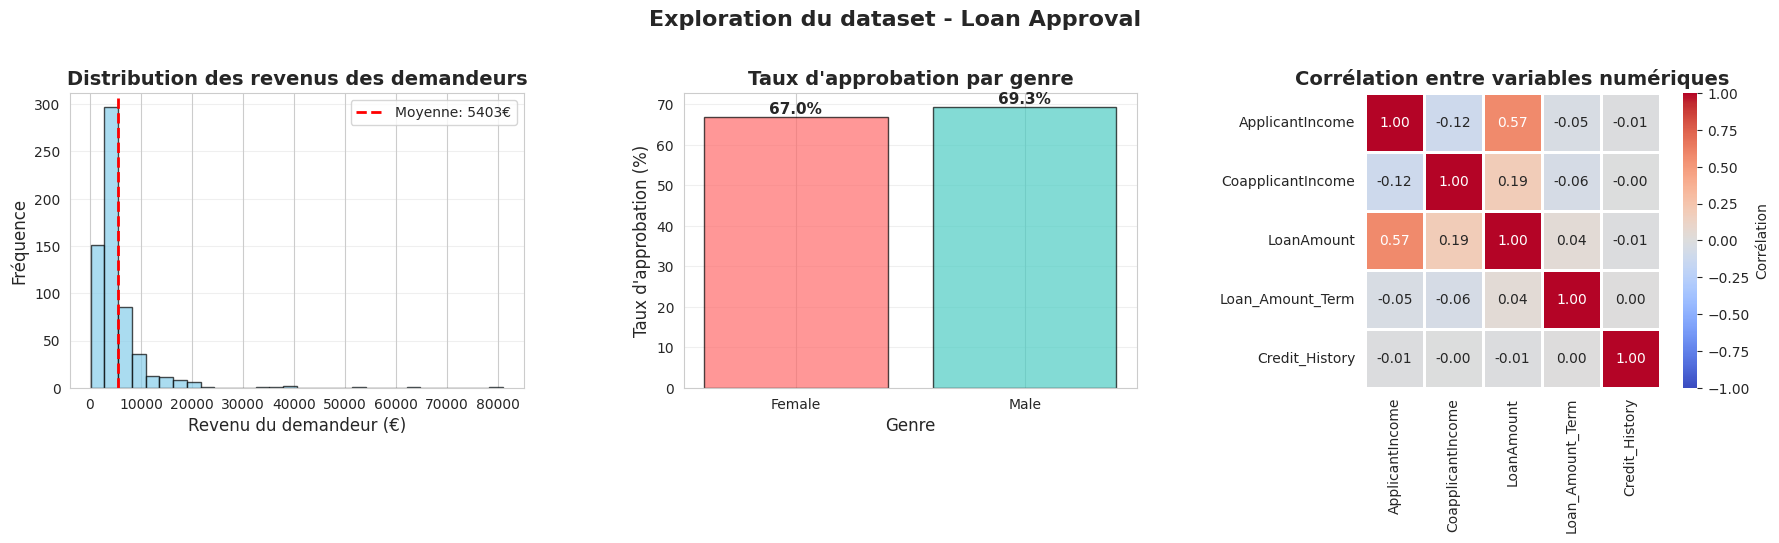

In [40]:
# TODO : Créer une heatmap des corrélations entre variables numériques
# Sélectionner uniquement les colonnes numériques
numerical_df = df[numerical_cols].select_dtypes(include=[np.number])

if len(numerical_df.columns) > 0:
    # Calculer la matrice de corrélation
    corr_matrix = numerical_df.corr()
    
    # Créer la heatmap
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, ax=axes[2],
                cbar_kws={'label': 'Corrélation'}, vmin=-1, vmax=1)
    axes[2].set_title('Corrélation entre variables numériques', fontsize=14, fontweight='bold')

print("✅ Visualisation 3 créée")

plt.tight_layout()
plt.savefig('exploration_visualizations.png', dpi=300, bbox_inches='tight')
print("\n✅ Graphiques sauvegardés dans 'exploration_visualizations.png'")
plt.show()

---
## BONUS : Analyses complémentaires

In [14]:
print("\n" + "=" * 80)
print("BONUS : ANALYSES COMPLÉMENTAIRES")
print("=" * 80)


BONUS : ANALYSES COMPLÉMENTAIRES


### Analyse 1 : Taux d'approbation par niveau d'éducation

In [15]:
# TODO : Analyser la relation entre l'éducation et l'approbation
if 'Education' in df.columns and 'Loan_Status' in df.columns:
    print("\nTaux d'approbation par niveau d'éducation :")
    approval_by_education = df.groupby('Education')['Loan_Status'].apply(
        lambda x: (x == 'Y').mean() * 100
    )
    print(approval_by_education)


Taux d'approbation par niveau d'éducation :
Education
Graduate        70.833333
Not Graduate    61.194030
Name: Loan_Status, dtype: float64


### Analyse 2 : Taux d'approbation par statut marital

In [16]:
# TODO : Analyser la relation entre le statut marital et l'approbation
if 'Married' in df.columns and 'Loan_Status' in df.columns:
    print("\nTaux d'approbation par statut marital :")
    approval_by_married = df.groupby('Married')['Loan_Status'].apply(
        lambda x: (x == 'Y').mean() * 100
    )
    print(approval_by_married)


Taux d'approbation par statut marital :
Married
No     62.910798
Yes    71.608040
Name: Loan_Status, dtype: float64


### Analyse 3 : Distribution du montant du prêt

In [17]:
# TODO : Analyser la distribution du montant du prêt
if 'LoanAmount' in df.columns:
    print("\nStatistiques du montant du prêt :")
    print(f"Moyenne : {df['LoanAmount'].mean():.2f} €")
    print(f"Médiane : {df['LoanAmount'].median():.2f} €")
    print(f"Min : {df['LoanAmount'].min():.2f} €")
    print(f"Max : {df['LoanAmount'].max():.2f} €")
    print(f"Écart-type : {df['LoanAmount'].std():.2f} €")


Statistiques du montant du prêt :
Moyenne : 146.41 €
Médiane : 128.00 €
Min : 9.00 €
Max : 700.00 €
Écart-type : 85.59 €


### Visualisation bonus : Boxplot du montant du prêt par statut

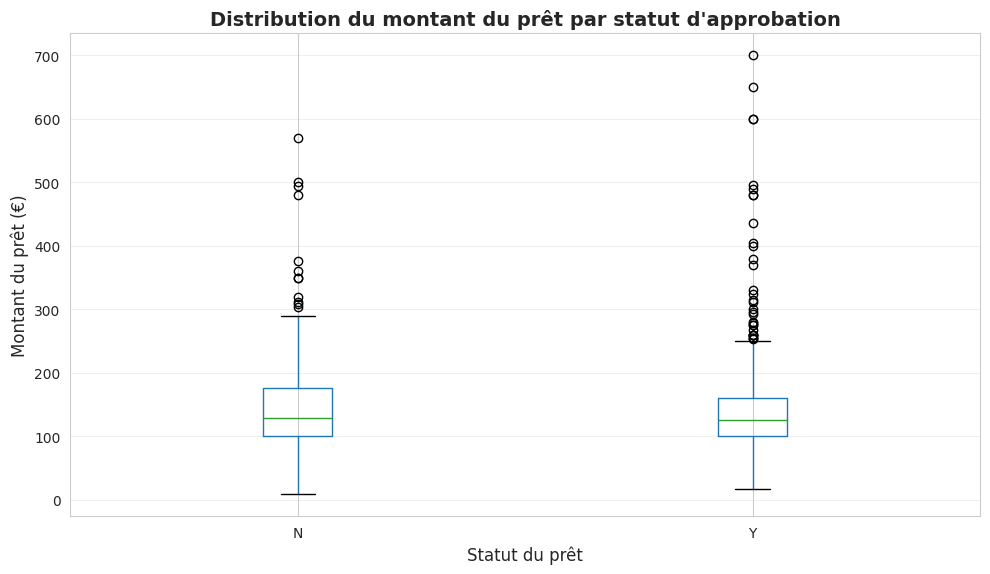


✅ Visualisation bonus créée


In [18]:
if 'LoanAmount' in df.columns and 'Loan_Status' in df.columns:
    plt.figure(figsize=(10, 6))
    
    # Créer le boxplot
    df.boxplot(column='LoanAmount', by='Loan_Status', ax=plt.gca())
    
    plt.suptitle('')  # Supprimer le titre automatique
    plt.title('Distribution du montant du prêt par statut d\'approbation', fontsize=14, fontweight='bold')
    plt.xlabel('Statut du prêt', fontsize=12)
    plt.ylabel('Montant du prêt (€)', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\n✅ Visualisation bonus créée")

---
## Conclusion du TP

### Ce que vous avez appris
✅ Charger et explorer un dataset avec Pandas  
✅ Identifier les types de variables  
✅ Détecter les valeurs manquantes  
✅ Calculer des statistiques descriptives  
✅ Créer des visualisations informatives  
✅ Analyser les relations entre variables  

### Prochaines étapes
Dans le **TP 3**, nous allons :
- Traiter les valeurs manquantes
- Détecter et traiter les outliers
- Créer de nouvelles features (feature engineering)
- Encoder les variables catégorielles

---
## 📝 Questions de réflexion

Prenez quelques minutes pour réfléchir aux questions suivantes :

1. **Valeurs manquantes** : Quelles colonnes ont le plus de valeurs manquantes ? Pourquoi selon vous ?

2. **Équilibre des classes** : Le taux d'approbation global vous semble-t-il équilibré ? Qu'est-ce que cela implique pour l'entraînement du modèle ?

3. **Biais potentiels** : Y a-t-il une différence de taux d'approbation entre hommes et femmes ? Que pensez-vous de cette différence ?

4. **Corrélations** : Quelles variables numériques sont le plus corrélées ? Comment pourrait-on utiliser cette information ?

5. **Visualisations supplémentaires** : Quelles autres visualisations seriez-vous intéressés à créer pour mieux comprendre les données ?
